In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
data = pd.read_csv(r'C:\Users\a2z\data scientist\projects\predictionprojects\house price prediction\kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


exploratory data analysis

In [4]:
data.shape

(21613, 21)

In [5]:
pd.set_option('display.float_format', lambda x : '%.8f' % x)

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000,21613.00000000
mean,4580301520.86498833,540088.14176653,3.37084162,2.11475732,2079.89973627,15106.96756582,1.49430898,0.00754176,0.23430343,3.40942951,7.65687318,1788.39069079,291.50904548,1971.00513580,84.40225790,98077.93980475,47.56005252,-122.21389640,1986.55249156,12768.45565169
std,2876565571.31204891,367127.19648270,0.93006183,0.77016316,918.44089705,41420.51151514,0.53998890,0.08651720,0.76631757,0.65074305,1.17545876,828.09097765,442.57504268,29.37341080,401.67924002,53.50502626,0.13856371,0.14082834,685.39130425,27304.17963134
min,1000102.00000000,75000.00000000,0.00000000,0.00000000,290.00000000,520.00000000,1.00000000,0.00000000,0.00000000,1.00000000,1.00000000,290.00000000,0.00000000,1900.00000000,0.00000000,98001.00000000,47.15590000,-122.51900000,399.00000000,651.00000000
25%,2123049194.00000000,321950.00000000,3.00000000,1.75000000,1427.00000000,5040.00000000,1.00000000,0.00000000,0.00000000,3.00000000,7.00000000,1190.00000000,0.00000000,1951.00000000,0.00000000,98033.00000000,47.47100000,-122.32800000,1490.00000000,5100.00000000
50%,3904930410.00000000,450000.00000000,3.00000000,2.25000000,1910.00000000,7618.00000000,1.50000000,0.00000000,0.00000000,3.00000000,7.00000000,1560.00000000,0.00000000,1975.00000000,0.00000000,98065.00000000,47.57180000,-122.23000000,1840.00000000,7620.00000000
75%,7308900445.00000000,645000.00000000,4.00000000,2.50000000,2550.00000000,10688.00000000,2.00000000,0.00000000,0.00000000,4.00000000,8.00000000,2210.00000000,560.00000000,1997.00000000,0.00000000,98118.00000000,47.67800000,-122.12500000,2360.00000000,10083.00000000
max,9900000190.00000000,7700000.00000000,33.00000000,8.00000000,13540.00000000,1651359.00000000,3.50000000,1.00000000,4.00000000,5.00000000,13.00000000,9410.00000000,4820.00000000,2015.00000000,2015.00000000,98199.00000000,47.77760000,-121.31500000,6210.00000000,871200.00000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

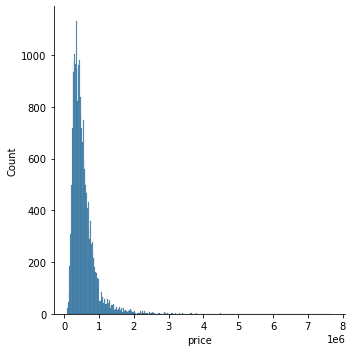

In [8]:
sns.displot(data['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

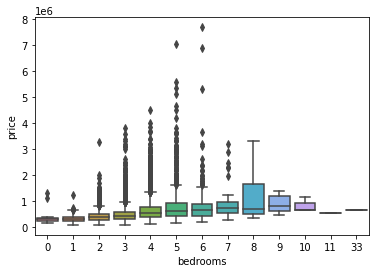

In [9]:
sns.boxplot(x='bedrooms',y='price',data=data)

#spliting of data for training and testing

In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
X = data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15']]

In [12]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00000000,1180,5650,1.00000000,0,0,3,7,1180,0,1340,5650
1,3,2.25000000,2570,7242,2.00000000,0,0,3,7,2170,400,1690,7639
2,2,1.00000000,770,10000,1.00000000,0,0,3,6,770,0,2720,8062
3,4,3.00000000,1960,5000,1.00000000,0,0,5,7,1050,910,1360,5000
4,3,2.00000000,1680,8080,1.00000000,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50000000,1530,1131,3.00000000,0,0,3,8,1530,0,1530,1509
21609,4,2.50000000,2310,5813,2.00000000,0,0,3,8,2310,0,1830,7200
21610,2,0.75000000,1020,1350,2.00000000,0,0,3,7,1020,0,1020,2007
21611,3,2.50000000,1600,2388,2.00000000,0,0,3,8,1600,0,1410,1287


In [13]:
Y=data['price']

In [14]:
Y

0       221900.00000000
1       538000.00000000
2       180000.00000000
3       604000.00000000
4       510000.00000000
              ...      
21608   360000.00000000
21609   400000.00000000
21610   402101.00000000
21611   400000.00000000
21612   325000.00000000
Name: price, Length: 21613, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [17]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
19642,4,2.50000000,2070,4270,2.00000000,0,0,3,8,2070,0,2070,4610
8626,3,2.25000000,1400,6970,2.00000000,0,0,3,8,1400,0,1800,8140
6954,5,3.00000000,2190,4900,2.00000000,0,0,5,7,1490,700,1370,4606
20242,4,2.50000000,2547,4800,2.00000000,0,0,3,9,2547,0,2598,4800
10376,5,3.50000000,4060,8309,2.00000000,0,0,3,9,2960,1100,1730,11711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25000000,1920,9672,2.00000000,0,0,4,8,1920,0,1950,10125
8006,3,1.00000000,1240,3600,1.50000000,0,0,3,7,1240,0,1680,3600
17745,3,2.25000000,1780,7332,2.00000000,0,0,3,7,1780,0,1510,7625
17931,2,1.00000000,1150,5000,1.00000000,0,0,4,7,1050,100,1463,4320


In [18]:
Y_train

19642   493000.00000000
8626    425000.00000000
6954    588000.00000000
20242   392440.00000000
10376   630000.00000000
              ...      
5695    625000.00000000
8006    390000.00000000
17745   272450.00000000
17931   552000.00000000
13151   394000.00000000
Name: price, Length: 16209, dtype: float64

In [19]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000000,1050,6317,1.50000000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000000,2040,9565,1.00000000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000000,2500,4000,2.00000000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000000,2360,19899,1.00000000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000000,1670,4440,1.00000000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,3,1.75000000,1520,5500,1.50000000,0,0,5,7,1520,0,2310,5500
2747,5,3.00000000,2970,10335,2.00000000,0,0,3,9,2970,0,2970,10335
15565,3,2.50000000,3440,103672,2.00000000,0,0,3,9,3440,0,2710,112820
21238,3,2.50000000,1572,4000,2.00000000,0,0,3,8,1572,0,1608,5175


In [20]:
Y_test

3834    349950.00000000
1348    450000.00000000
20366   635000.00000000
16617   355500.00000000
20925   246950.00000000
              ...      
7148    738000.00000000
2747    726000.00000000
15565   560000.00000000
21238   299000.00000000
2333    555000.00000000
Name: price, Length: 5404, dtype: float64

Normalization basically standarization where mean become 0 and std devaition become 1

model training

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
#time to train model 
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
#time to predict
Y_pred=lr.predict(X_test)

In [26]:
Y_pred

array([356776.02589272, 511927.33428638, 573736.52389144, ...,
       824101.44697959, 437013.51415342, 731915.82170722])

In [27]:
Y_test

3834    349950.00000000
1348    450000.00000000
20366   635000.00000000
16617   355500.00000000
20925   246950.00000000
              ...      
7148    738000.00000000
2747    726000.00000000
15565   560000.00000000
21238   299000.00000000
2333    555000.00000000
Name: price, Length: 5404, dtype: float64

now we will check accureacy and for regression mean abs error and r2_score is used

In [28]:
from sklearn.metrics import mean_absolute_error,r2_score

In [29]:
mean_absolute_error(Y_test, Y_pred)

151500.5360108995

In [30]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000000,1050,6317,1.50000000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000000,2040,9565,1.00000000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000000,2500,4000,2.00000000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000000,2360,19899,1.00000000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000000,1670,4440,1.00000000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,3,1.75000000,1520,5500,1.50000000,0,0,5,7,1520,0,2310,5500
2747,5,3.00000000,2970,10335,2.00000000,0,0,3,9,2970,0,2970,10335
15565,3,2.50000000,3440,103672,2.00000000,0,0,3,9,3440,0,2710,112820
21238,3,2.50000000,1572,4000,2.00000000,0,0,3,8,1572,0,1608,5175


In [31]:
X_test.loc[2333]

bedrooms            3.00000000
bathrooms           3.00000000
sqft_living      2920.00000000
sqft_lot        23085.00000000
floors              1.50000000
waterfront          0.00000000
view                2.00000000
condition           3.00000000
grade               7.00000000
sqft_above       1540.00000000
sqft_basement    1380.00000000
sqft_living15    2270.00000000
sqft_lot15      18180.00000000
Name: 2333, dtype: float64

In [32]:
r2_score(Y_test, Y_pred)#r2 is like accuracy score for regression ,it gives us 62%

0.6211653492243786

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier()

In [35]:
clf.fit(X_train,Y_train)

MemoryError: could not allocate 887357440 bytes

In [ ]:
clf.predict(Y_)

lets predict for single house

In [ ]:
new_house=[[3,3,2920,23085,1,0,2,3,7,1540,1380,2300,19000]]

In [ ]:
house_pred=(lr.predict(new_house)) 

In [ ]:
house_pred